In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/ngaut/Documents/Ironhack/Week 5/Lab/archive/amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [8]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [24]:
#Generate a frequency table for the product category.
category_df=df["category"].value_counts()
category_df

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [20]:
#Which are the top 5 most listed product categories?
category_df.nlargest(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [32]:
subset_category_df=category_df.nlargest(5)
subset_category_df

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

C:\Users\ngaut\AppData\Local\Temp\ipykernel_21560\1367642781.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subset_category_df.index, y=subset_category_df.values, palette="Set3")


Text(0.5, 1.0, 'Product Distribution by Category')

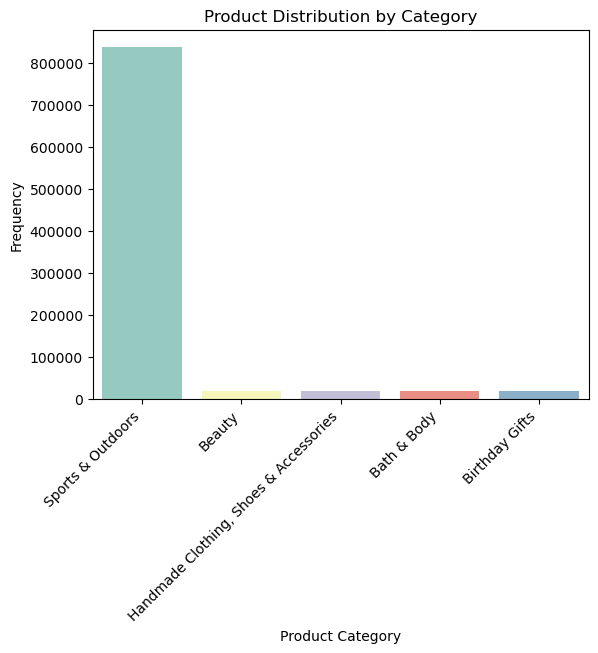

In [44]:
#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
sns.barplot(x=subset_category_df.index, y=subset_category_df.values, palette="Set3")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Product Distribution by Category')

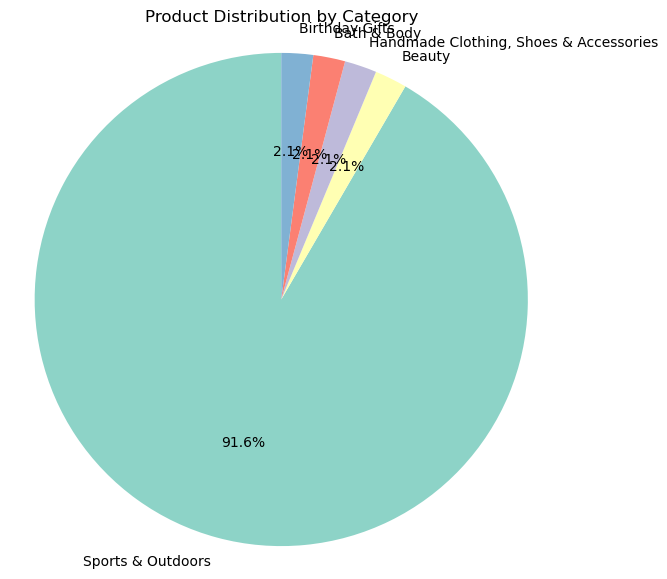

In [54]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

plt.figure(figsize=(7, 7)) 
plt.pie(subset_category_df.values, labels=subset_category_df.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap("Set3").colors)
plt.title('Product Distribution by Category')
plt.show()


Does any category dominate the listings?

Sports & Outdoors dominates the listings

In [56]:
df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [60]:
#Measures of Centrality:

#Calculate the mean, median, and mode for the price of products.
price_mean=df["price"].mean()
price_median=df["price"].median()
price_mode=df["price"].mode()

price_mean,price_median,price_mode

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

What's the average price point of products listed? How does this compare with the most common price point (mode)?

Mean = 89.24
Mode = 9.99
Mode shows that majority of items are priced 9.99
and Mean shows the avergae price of all the products. 
Though there are many products on price 9.99 there are costlier productes in the list that are pulling the mean towards the higher mean and hence the mean value is higher compared to mode value

In [62]:
#Measures of Dispersion:
#Determine the variance, standard deviation, range, and interquartile range for product price.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

How varied are the product prices? Are there any indicators of a significant spread in prices?

variance_price= 119K
std_dev_price=345
min_price=0.0
max_price=100000
range_price=100000
quantiles_price:
0.25     9.99 0.50    19.09
 0.75    45.

The variance, a measure of how far each price in the set is from the mean, is approximately (119K). A high variance implies that prices of items in the list can be quite different from one another.

The range(range_price=100000) shows that the the diversity in prices within the dataset.

Q1(0.25) is 9.99 hence the price of 25% of the products is below 9.99
Q2(0.50) is 19.09 hence the price of 50% of the products is below 19.09
Q3(0.75) is 45.99 hence the price of 75% of the products is below 45.9999

In [ ]:
#Visualizations:

#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [64]:
df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

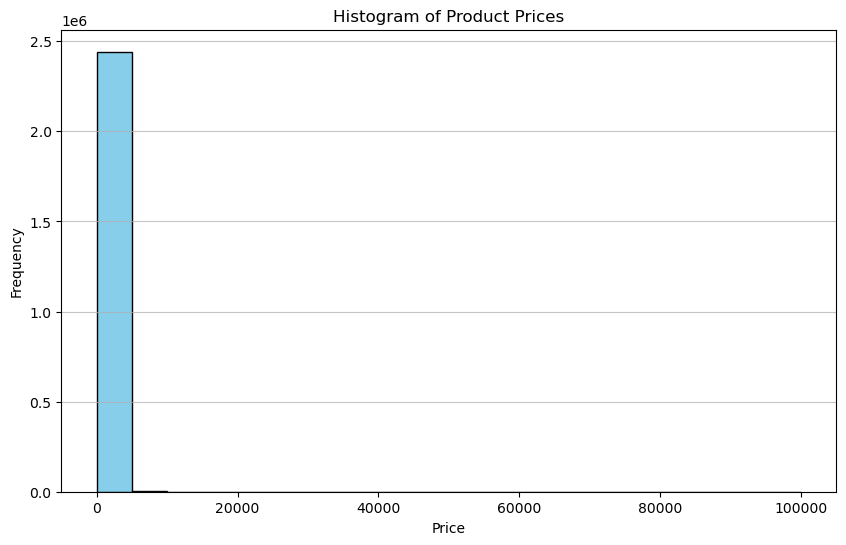

In [70]:
plt.figure(figsize=(10, 6)) 
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram looks concentrated one one-side since the distribution of prices is concentrated within the price range 0 to 100(roughly) and the outliers in the data is causing the graph to look very one-sided.

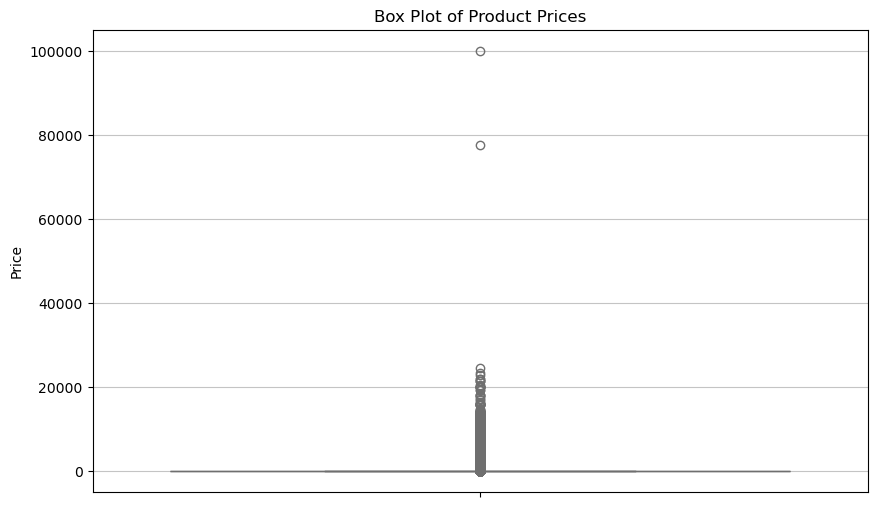

In [76]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'], color='skyblue')
plt.title('Box Plot of Product Prices')
plt.ylabel('Price')
plt.grid(axis='y', alpha=0.75)
plt.show()

The box plot shows that there are products priced significantly higher than the rest, as indicated by the outliers. 

Outliers: The individual points above the whiskers indicate products that are priced much higher than the majority. These outliers represent prices that fall outside the typical range and could potentially skew the analysis.

In [82]:
#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?

mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")

Mean Rating: 2.152836472966065
Median Rating: 0.0
Mode Rating: 0.0


The mean rating of 2.15 suggests that, on average, customers are giving products low ratings.The median rating being 0.0 indicates that at least half of the ratings are 0 and the mode being 0.0 reinforces the finding that the most frequently occurring rating is zero

In [86]:
#Determine the variance, standard deviation, and interquartile range for product rating.


variance = df['stars'].var()
std_dev = df['stars'].std()
IQR = df['stars'].quantile([0.25, 0.5, 0.75])

print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Interquartile Range (IQR): {IQR}")


Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
Interquartile Range (IQR): 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


The standard deviation, being approximately 2.19, also reflects that the ratings deviate from the mean by 2.19. Since this value is larger than the mean (2.15), it suggests that there are ratings both above and below the average, indicating inconsistency in customer feedback.

In [88]:
#Calculate the skewness and kurtosis for the rating column.

skewness = df['stars'].skew()
kurtosis = df['stars'].kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985


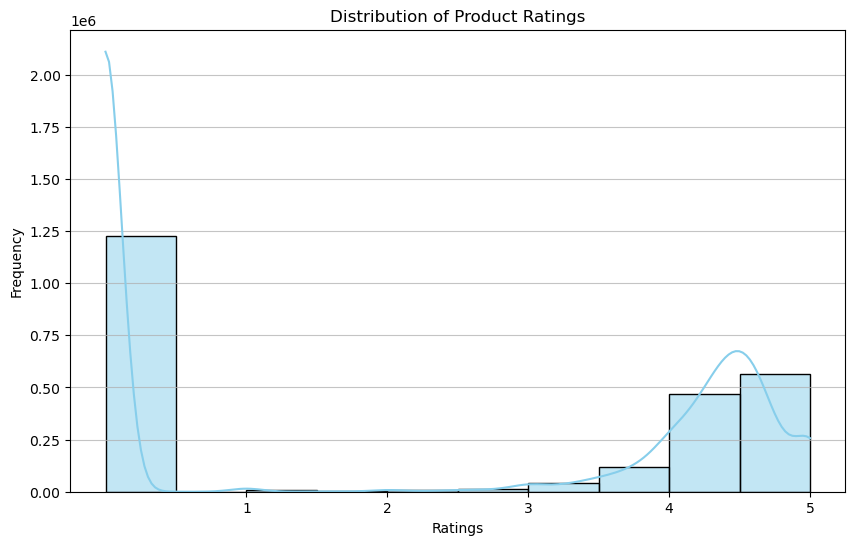

In [93]:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', alpha=0.75)
plt.show()

In [101]:
df["stars"].value_counts().nlargest(5)

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
Name: count, dtype: int64